In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import xgboost as xgb

In [2]:
features = pd.read_excel('Feature_Selection.xlsx')

In [3]:
features.head()

,Feature Name,Code Name,Missing Values
0,"Are you currently on any kind of diet, either ...",DRQSDIET,677
1,Total number of foods/beverages reported in th...,DR1TNUMF,727
2,Energy (kcal),DR1TKCAL,727
3,Protein (gm),DR1TPROT,727
4,Carbohydrate (gm),DR1TCARB,727


In [4]:
code_names = features.loc[:,'Code Name'].to_list()

In [37]:
code_names.append('SEQN')

In [6]:
df_labs = pd.read_csv('labs.csv', low_memory = False)
df_diet = pd.read_csv('diet.csv', low_memory = False)

In [7]:
df_labs = df_labs[['SEQN', 'LBXTC']]

In [8]:
df_diet = df_diet[code_names]

In [9]:
df = pd.merge(df_labs,df_diet)

Target variable is cholestrol value from lab data

In [10]:
df['LBXTC'].isnull().sum()

2189

Dropping the rows with null target variable value

In [11]:
df.dropna(axis = 0, subset= ['LBXTC'], inplace = True)

In [12]:
df.isnull().sum()

SEQN          0
LBXTC         0
DRQSDIET    677
DR1TNUMF    727
DR1TKCAL    727
DR1TPROT    727
DR1TCARB    727
DR1TSUGR    727
DR1TFIBE    727
DR1TTFAT    727
DR1TSFAT    727
DR1TMFAT    727
DR1TPFAT    727
DR1TCHOL    727
DR1TATOC    727
DR1TATOA    727
DR1TACAR    727
DR1TBCAR    727
DR1TNIAC    727
DR1TFOLA    727
DR1TFA      727
DR1TCHL     727
DR1TCALC    727
DR1TPHOS    727
DR1TMAGN    727
DR1TCOPP    727
DR1TPOTA    727
DR1TTHEO    727
DR1TALCO    727
DRD340      673
dtype: int64

In [14]:
#all data types are str; converting to float
df = df.apply(lambda x: x.astype(float),axis = 0)

In [15]:
df = df.apply(lambda x: x.fillna(x.mean(),axis = 0))

In [26]:
df.head()

,SEQN,LBXTC,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,...,DR1TFA,DR1TCHL,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TCOPP,DR1TPOTA,DR1TTHEO,DR1TALCO,DRD340
0,73557.0,167.0,2.0,11.0,1574.0,43.63,239.59,176.47,10.8,52.81,...,66.0,216.3,949.0,756.0,206.0,1.072,2228.0,36.0,0.0,2.0
1,73558.0,170.0,2.0,8.0,5062.0,338.13,423.78,44.99,16.7,124.29,...,601.0,2149.0,3193.0,6427.0,903.0,4.130,4930.0,0.0,119.0,1.0
2,73559.0,126.0,1.0,27.0,1743.0,64.61,224.39,102.90,9.9,65.97,...,290.0,161.2,877.0,1198.0,210.0,0.949,1694.0,71.0,0.0,1.0
3,73560.0,168.0,2.0,19.0,1490.0,77.75,162.92,80.58,10.6,58.27,...,126.0,268.9,1521.0,1495.0,183.0,0.542,2088.0,0.0,0.0,2.0
4,73561.0,201.0,1.0,7.0,1421.0,55.24,178.20,87.78,12.3,55.36,...,389.0,218.1,1410.0,1182.0,396.0,1.984,1445.0,0.0,0.0,1.0


In [45]:
target = np.where([x > 200 for x in df['LBXTC']],1,0)
data = df.iloc[:,2:]

**3 Exploratory Data Analysis**

In [57]:
class_1 = [x for x in target if x == 1]
class_0 = [x for x in target if x == 0]

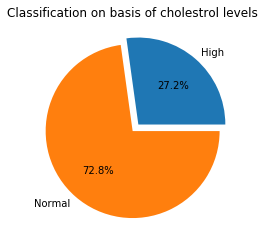

In [79]:
plt.pie([len(class_1), len(class_0)], labels = ['High', 'Normal'], explode = (0.1,0), autopct='%1.1f%%')
plt.title('Classification on basis of cholestrol levels')
plt.show()

In [25]:
print("High cholestrol",len(class_1))
print("Normal cholestrol class",len(class_0))

High cholestrol 2073
Normal cholestrol class 5487


Standardize data

In [30]:
scaler = preprocessing.StandardScaler()
data_std = scaler.fit_transform(data)

In [36]:
data_std.shape

(7624, 28)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(data_std, target, test_size=0.4, random_state = 2)

**5.1 Logistic Regression with L1**

In [100]:
model_lr_l1 = LogisticRegression(penalty = 'l1', C = 1, solver = 'saga', max_iter = 1000)
model_lr_l1.fit(X_train, y_train)
pred = model_lr_l1.predict(X_test)

In [104]:
print("Recall: ", recall_score(y_test, pred))

Recall:  0.01680672268907563


In [101]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84      2217
           1       0.42      0.02      0.03       833

    accuracy                           0.73      3050
   macro avg       0.58      0.50      0.44      3050
weighted avg       0.65      0.73      0.62      3050



In [102]:
print(confusion_matrix(y_test,pred, labels = [0,1]))

[[2198   19]
 [ 819   14]]


**5.2 Logistic regression with l2 and feature importance**

**6 Random Forest and XGBoost**


In [106]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [143]:
param = {
    'eta': 0.8, 
    'max_depth': 10,  
    'objective': 'multi:softprob',  
    'num_class': 2} 

steps = 20 

In [144]:
model_xgb = xgb.train(param, dtrain, steps)

In [145]:
preds = model_xgb.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])

In [146]:
print("Recall: ", recall_score(y_test,best_preds))

Recall:  0.1608643457382953


**7 Fine Tuning (can use grid_search_cv)**

**8 Cluster models**